In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

[[ 0.81680544  0.5216447 ]
 [ 1.61859642 -0.37982927]
 [-0.02126953  0.27372826]
 [-1.02181041 -0.07543984]
 [ 1.76654633 -0.17069874]
 [ 1.8820287  -0.04238449]
 [ 0.97481551  0.20999374]
 [ 0.88798782 -0.48936735]
 [ 0.89865156  0.36637762]
 [ 1.11638974 -0.53460385]
 [-0.36380036  0.82790185]
 [ 0.24702417 -0.23856676]
 [ 1.81658658 -0.13088387]
 [ 1.2163905  -0.40685761]
 [-0.8236696   0.64235178]
 [ 0.98065583  0.20850838]
 [ 0.54097175  0.88616823]
 [ 0.348031   -0.30101351]
 [ 0.35181497  0.88827765]
 [-0.77708642  0.82253872]
 [ 1.92590813  0.01214146]
 [ 0.86096723 -0.47653216]
 [ 0.19990695  0.99672359]
 [ 1.2895301  -0.37071087]
 [-0.27847636  1.02538452]
 [ 0.24187916 -0.07627812]
 [ 1.84988768 -0.09773674]
 [ 1.88406869  0.0449402 ]
 [ 0.165822   -0.08613126]
 [ 0.13861369  0.89639036]
 [ 0.89087024  0.52265882]
 [-0.22806587  0.84091882]
 [ 0.98279208 -0.46457771]
 [ 0.04237749  0.19457898]
 [ 0.76422612  0.67223332]
 [ 1.91108938  0.21178339]
 [ 0.43608432 -0.23007221]
 

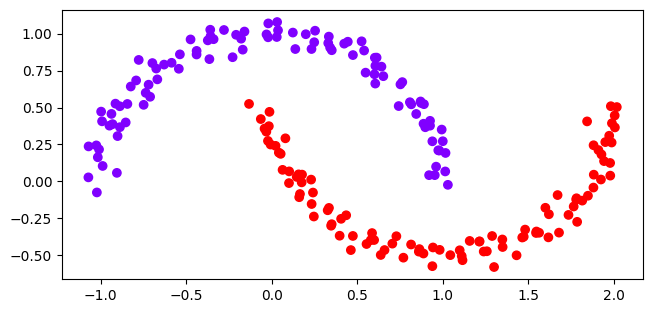

In [4]:
X,y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
print(X)
print(y)
clustering = DBSCAN(eps = 0.2, min_samples =5)
clustering.fit(X)
plt.figure(figsize =(7.5,3.5))
plt.scatter(X[:,0], X[:,1],c = clustering.labels_, cmap ='rainbow')
plt.show()

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [11]:
mnist = fetch_openml('mnist_784', version =1)
X = mnist.data.astype('float32')
y = mnist.target.astype('int')
print("Shape of X:", X.shape)

Shape of X: (70000, 784)


In [12]:
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
pca = PCA(n_components =50)
X_pca = pca .fit_transform(X_scaled)
print("Reduced shape:", X_pca.shape)

Reduced shape: (70000, 50)


In [14]:
dbscan = DBSCAN(eps=3, min_samples = 5, n_jobs = -1)
labels = dbscan.fit_predict(X_pca)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.036883668896325085


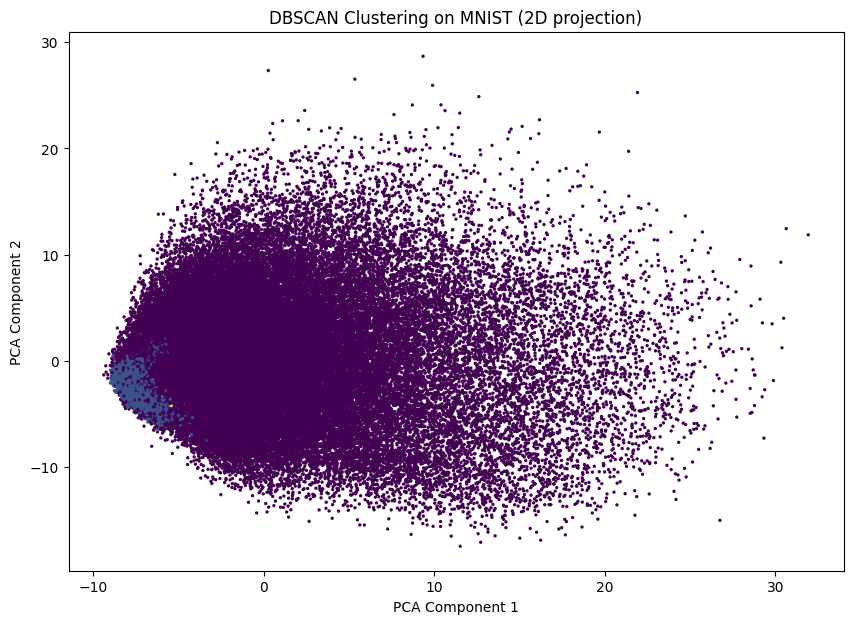

In [27]:
pca_2d = PCA(n_components =2)
X_2d = pca_2d.fit_transform(X_scaled)
plt.figure(figsize= (10,7))
plt.scatter(X_2d[:,0], X_2d[:,1],c = labels, s=2)   # cmap = 'tab10' ,'rainbow', 'plasma'
plt.title("DBSCAN Clustering on MNIST (2D projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [30]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef,confusion_matrix,accuracy_score

In [31]:
X,y = load_iris(return_X_y =True)
X = X[y!=2]
y = y[y!=2]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [32]:
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa:",kappa)

Cohen's Kappa: 1.0


In [34]:
mcc = matthews_corrcoef(y_test,y_pred)
print("Matthews Correlation Coefficient:",mcc)

Matthews Correlation Coefficient: 1.0


In [35]:
kf = KFold(n_splits = 5, shuffle= True, random_state =42)
model = LogisticRegression()
for fold ,(train_index, test_index) in enumerate(kf.split(X),1):
    X_train_fold , X_test_fold = X[train_index],X[test_index]
    y_train_fold , y_test_fold = y[train_index],y[test_index]
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    acc = accuracy_score(y_test_fold, y_pred_fold)
    print(f" Fold{fold} Accuracy:{acc:.3f}")

 Fold1 Accuracy:1.000
 Fold2 Accuracy:1.000
 Fold3 Accuracy:1.000
 Fold4 Accuracy:1.000
 Fold5 Accuracy:1.000


In [36]:
scores =cross_val_score(LogisticRegression(),X,y ,cv=5)
# cross_val_score(model, X_train, y_train, cv =3,scoring = "accuracy")
print("Cross Validation Accuracies:", scores)
print("Mean CV Accuracy:", np.mean(scores))

Cross Validation Accuracies: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [37]:
from sklearn.metrics import cohen_kappa_score
rater1 = [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]
rater2 = [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
print(cohen_kappa_score(rater1, rater2))


0.21052631578947367


In [48]:
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


   Feature 1  Feature 2  Target
0  -0.872929   0.013042       1
1   1.312935   2.770534       1
2   2.340428   2.420996       1
3   2.294548  -0.404380       1
4   0.944105   0.477241       1


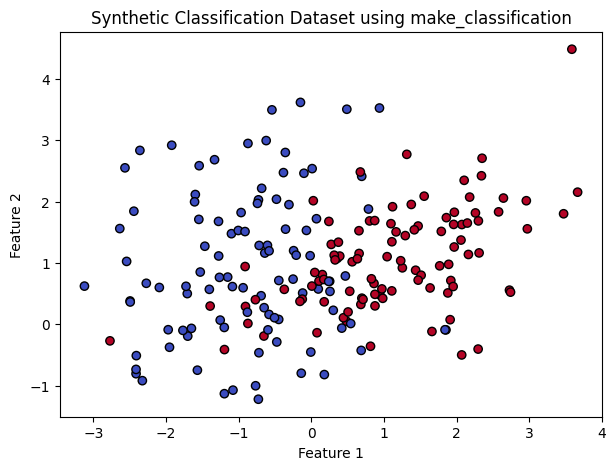

In [45]:
X,y = make_classification(
    n_samples =200,     #number of data points
    n_features = 2,     #number of features
    n_informative = 2,  #number of useful features
    n_redundant = 0,    #number of redundant features
    n_clusters_per_class =1 ,
    n_classes =2,       # Binary classification
    random_state =42
)

df = pd.DataFrame(X, columns =['Feature 1', 'Feature 2'])
df['Target'] =y
print(df.head())

plt.figure(figsize =(7,5))
plt.scatter(X[:,0],X[:,1], c=y ,cmap ='coolwarm',edgecolor ='k')
plt.title("Synthetic Classification Dataset using make_classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [52]:
X,y = make_classification(
    n_samples =500,
    n_features =6,
    n_informative=4,
    n_redundant = 2,
    n_classes = 3,
    random_state = 1)
print(X.shape)
print(y.shape)

(500, 6)
(500,)


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [61]:
X, y = make_classification(
    n_samples=300,
    n_features=2,     
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=2,
    random_state=42
)

X_train ,X_test,y_train, y_test = train_test_split(X, y,test_size =0.3, random_state =42)
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))


Accuracy: 0.9555555555555556

Confusion Matrix:
 [[44  2]
 [ 2 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.95      0.95      0.95        44

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_moons
from sklearn.cluster import KMeans

In [64]:
n_samples = 300
n_features = 2
n_clusters = 4
random_state = 0

X_class, y_class = make_classification(
    n_samples = n_samples,
    n_features = n_features,
    n_redundant = 0,
    n_informative = n_features,
    n_clusters_per_class = 1,
    n_clusters = n_clusters,
    random_state = random_state
  )

X_blobs, y_blobs = make_blobs(
      n_samples = n_samples,
      centers = n_clusters,
      n_features = n_features,
      cluster_std = 1.0,
      random_state = random_state  
   )

X_moons, y_moons = make_moons(
       n_samples = n_samples,
       noise = 1.0,
       random_state = random_state
    )

fig ,axes = plt.subplots(1,3,figsize=(15,4))
axes[0].scatter(X_class[:,0], X_class[:,1], c= y_class, cmap ='plasma', s= 30)
axes[0].set_title("make_classification  (Unclustered)")
axes[1].scatter(X_blobs[:,0], X_blobs[:,1], c = y_blobs, cmap ='plasma', s =30)
axes[1].set_title("make_blobs (Unclustered)")
axes[2].scatter(X_moons[:,0],X_moons[:,1],c = y_moons, cmap ='plasma', s=30)
axes[2].set_title("make_moons  (Unclustered)")

for ax in axes:
    ax.set_xlabel('Feature 1')
    ax.set_ylabel("Feature 2")
    
plt.tight_layout()
plt.show()
    
kmeans_class = KMeans(n_clusters = n_clusters, random_state = random_state)
labels_class = kmeans_class.fit_predict(X_class)

kmeans_blobs = KMeans(n_clusters = n_clusters, random_state = random_state)
labels_blobs = kmeans_blobs.fit_predict(X_blobs)

kmeans_moons = Kmeans(n_clusters =2 , raandom_state = random_state)
labels_moons = kmeans_moons.fit_predict(X_moons)

fig, axes = plt.subplot(1,3,(15,4))
axes[0].scatter(X_class[:,0], X_class[:,1], c = labels_class, cmap ='plasma', s= 30)
axes[0].scatter(kmeans_class.cluster_centers[:,0],kmeans_class.cluster_centers[:,1], c='red', s= 200,marker ='X')
axes[0].set_title("K-Means on make_classification")
                
axes[1].scatter(X_blobs[:,0],X_blobs[:,1],c= labels_blobs , cmap ='plasma', s=30)
axes[1].scatter(kmeans_blobs.cluster_centers[:,0],kmeans_blobs.cluster_centers[:,1], c='red',s=200, marker ='X')
axes[1].set_title("K-Means on make_blobs")
    
axes[2].scatter(X_moons[:,0],X_moons[:,1], c= labels_moons, cmap='plasma',s=30)
axes[2].scatter(kmeans_moons.cluster_centers[:,0], kmeans_moons.cluster_centers[:,1],c='red', s=200, marker ='X')
axes[2].set_title("K-Means on make_moons")



for ax in axes:
    ax.set_xlabel('Feature 1')
    ax.set_ylabel("Feature 2)

plt.tight_layout()
plt.show()








TypeError: got an unexpected keyword argument 'n_clusters'

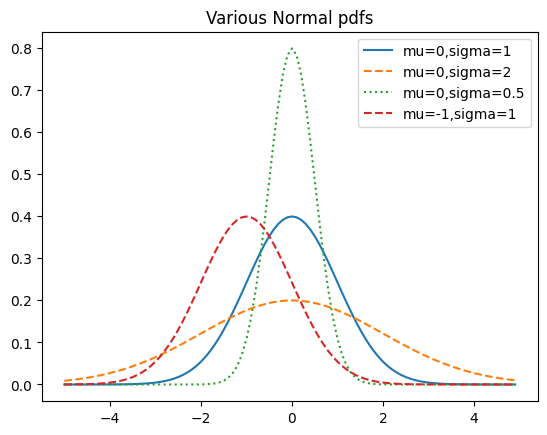

In [10]:
import math
import matplotlib.pyplot as plt

def normal_pdf(x,mu=0,sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu)** 2 / 2 /sigma **2) /( sqrt_two_pi * sigma))
xs = [x /10.0 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma = 1) for x in xs ],'-',label ='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma =2) for x in xs], '--',label ='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x, mu =-1) for x in xs],'--',label ='mu=-1,sigma=1')
plt.title("Various Normal pdfs")
plt.legend()
plt.show()
         

    